In [12]:
import numpy as np
from numba import njit
from timeit import repeat

N = [10, 100, 1000, 10000, 20000]
p = 0.5

def numpy_ref(N, p):
    """ Numpy reference for initializing and summing over all elements. """
    a = np.empty((N, N), dtype='f8')
    a[:,:] = p
    return a.sum()

@njit
def fun(i,j, p):
    return p

@njit
def funct_eval(N, fun, p):
    x = 0
    for i in range(N):
        for j in range(N):
            x += fun(i,j, p)
    return x

@njit
def loop_eval(N, p):
    x = 0
    for i in range(N):
        for j in range(N):
            x += p
    return x


In [13]:
# Numpy reference 
np_ref = [None]*len(N)
for i, n in enumerate(N):
    np_ref[i] = np.array(repeat("numpy_ref({}, 0.5)".format(n), 
                                setup="from __main__ import numpy_ref",
                                number=5, repeat=5)) / 5

In [14]:
# No function call
loop = [None]*len(N)
for i, n in enumerate(N):
    loop[i] = np.array(repeat("loop_eval({}, 0.5)".format(n), 
                              setup="from __main__ import loop_eval",
                              number=7, repeat=5)) / 7

In [15]:
# With function call
func = [None]*len(N)
for i, n in enumerate(N):
    func[i] = np.array(repeat("funct_eval({}, fun, 0.5)".format(n), 
                              setup="from __main__ import funct_eval, fun",
                              number=7, repeat=5)) / 7

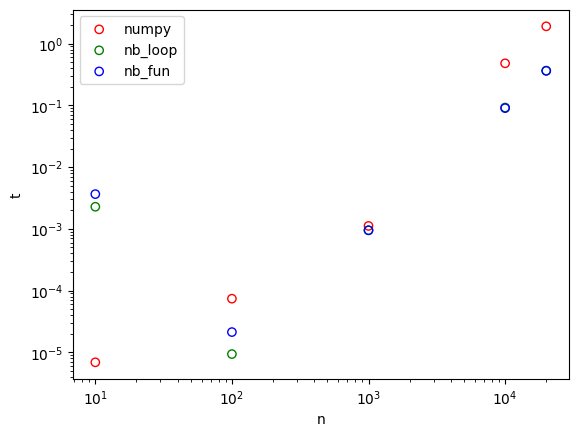

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(N, np.mean(np_ref, axis=1), marker='o', facecolor='None', edgecolor='r', label='numpy')
ax.scatter(N, np.mean(loop, axis=1), marker='o', facecolor='None', edgecolor='g', label='nb_loop')
ax.scatter(N, np.mean(func, axis=1), marker='o', facecolor='None', edgecolor='b', label='nb_fun')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n')
ax.set_ylabel('t')
plt.legend()

plt.show()